# Notebook 01:

## Reading raw data:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline

In [2]:
data = pd.read_csv('../data/raw/energy_production.csv', delimiter=';')
data.columns = ['temp', 'exh_p', 'amb_p', 'rel_h', 'power']
data

,temp,exh_p,amb_p,rel_h,power
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [3]:
X = data[['temp', 'exh_p', 'amb_p', 'rel_h']]
y = data['power']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [4]:
data.describe()

,temp,exh_p,amb_p,rel_h,power
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
# In the table above, max value of rel_h is greater than 100.
# Since the rel_h value must not pass 100,
#we should check how many of them are out of range!

(data.rel_h >= 100).sum()

np.int64(57)

In [6]:
data.corr()

,temp,exh_p,amb_p,rel_h,power
temp,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exh_p,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_p,-0.507549,-0.413502,1.000000,0.099574,0.518429
rel_h,-0.542535,-0.312187,0.099574,1.000000,0.389794
power,-0.948128,-0.869780,0.518429,0.389794,1.000000


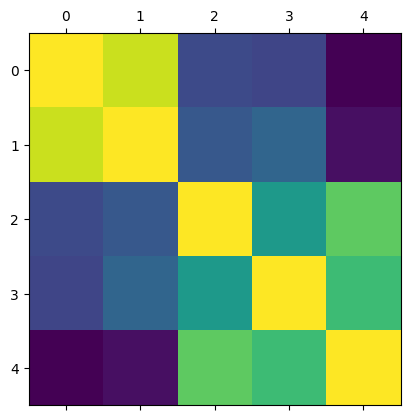

In [7]:
plt.matshow(data.corr())
pass

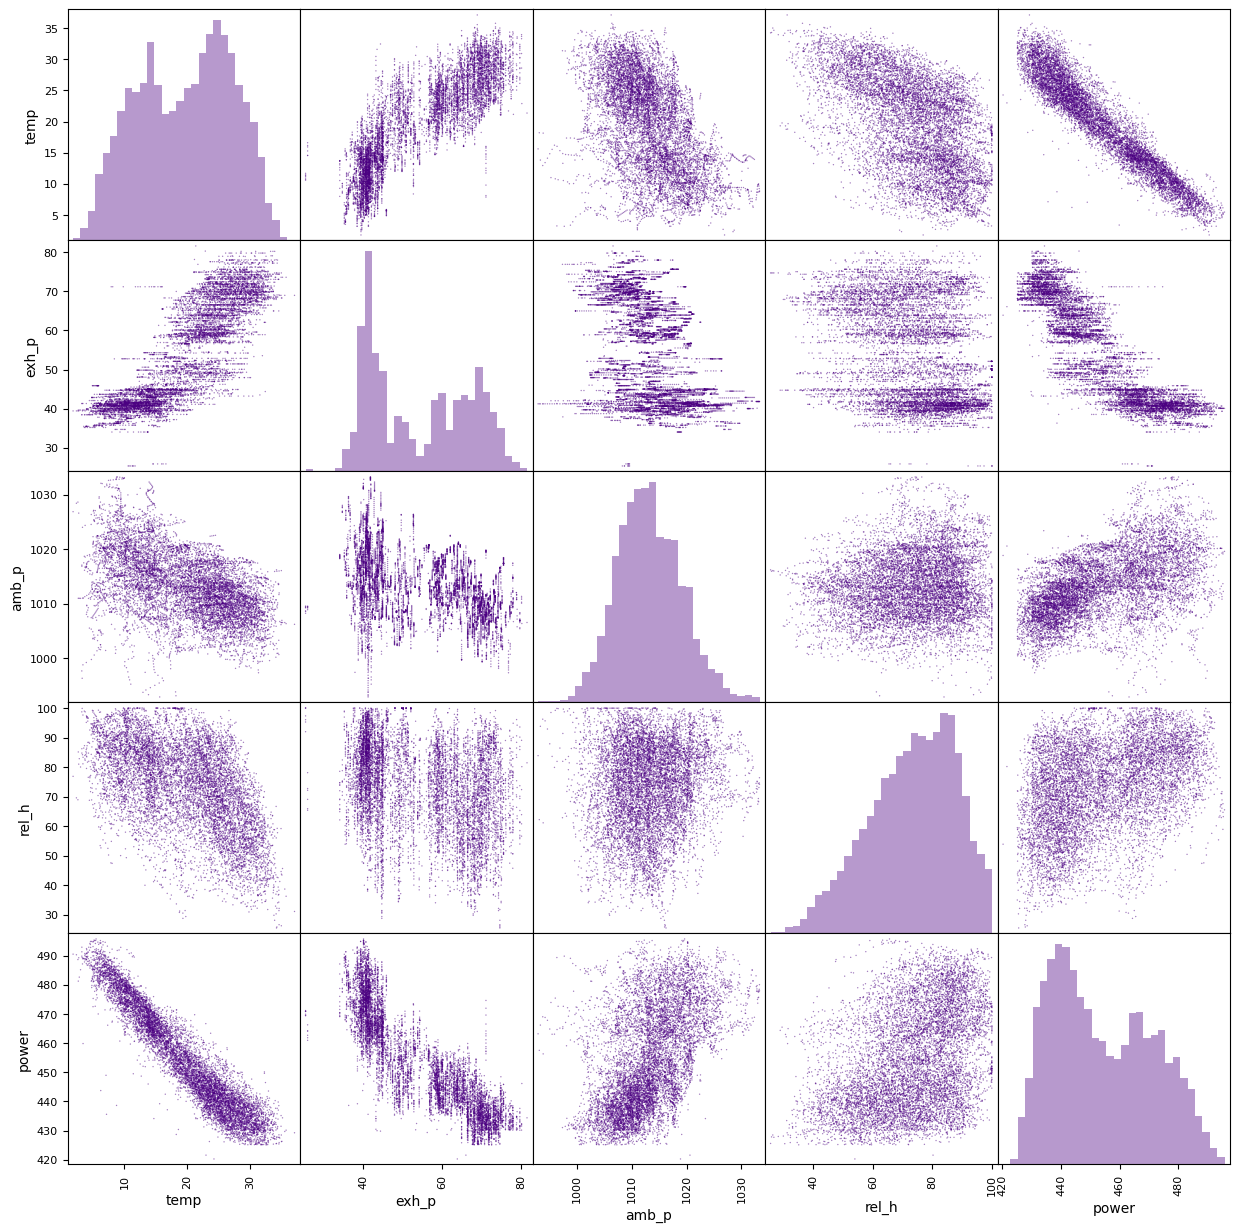

In [8]:
pd.plotting.scatter_matrix(data, figsize=(15,15), marker = 'o', color = 'indigo',
                           hist_kwds = {'bins': 30, 'color': 'indigo', 'alpha': 0.4},
                           s = 1, alpha = 0.5)
pass

In [9]:
def evaluate_model(model, X_train = X_train, X_test = X_test,
                  y_train = y_train, y_test = y_test):
    '''
    Calculates R2 score on train an test sets.

    parameters
    ----------

    model: `sklearn model`
        
    X_train: `DataFrame`
        
    X_test: `DataFrame`

    y_train: `Series`

    y_test: `Series`
        
    returns
    -------

    None
    '''
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    train_y_pred = model.predict(X_train)
    test_y_pred = model.predict(X_test)
    train_mae = mean_absolute_error(y_train, train_y_pred)
    test_mae = mean_absolute_error(y_test, test_y_pred)

    print('train r2 score : {:.4f}, test r2 score : {:.4f}'.format(train_score, test_score))
    print('train ma error : {:.4f}, test ma error : {:.4f}'.format(train_mae, test_mae))

In [10]:
# Train a vanila model:

model0 = LinearRegression()
model0.fit(X_train, y_train)

evaluate_model(model0)

train r2 score : 0.9316, test r2 score : 0.9200
train ma error : 3.6042, test ma error : 3.6930


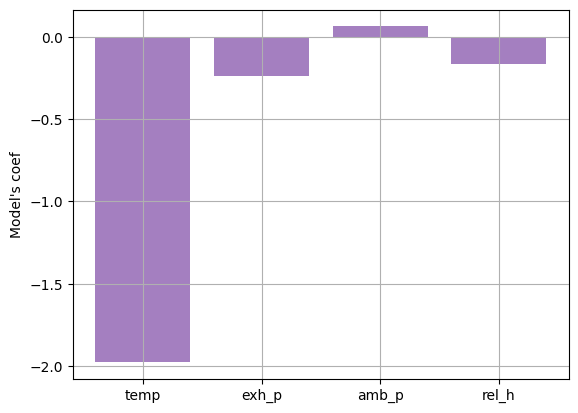

In [11]:
plt.bar(X.columns, model0.coef_, color='indigo', alpha=0.5)
plt.ylabel("Model's coef")
plt.grid()

In [12]:
# Train a linear model on scaled data:

scaler = StandardScaler()
scaler.fit(X_train)
X_train_t, X_test_t = scaler.transform(X_train), scaler.transform(X_test)

model1 = LinearRegression()
model1.fit(X_train_t, y_train)
evaluate_model(model1, X_train = X_train_t, X_test = X_test_t)

train r2 score : 0.9316, test r2 score : 0.9200
train ma error : 3.6042, test ma error : 3.6930


In [13]:
# Add polynomial features to data:

poly = PolynomialFeatures(degree=2)
poly.fit(X)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

model2 = LinearRegression()
model2.fit(X_train_poly, y_train)
model2.score(X_test_poly, y_test)
evaluate_model(model2, X_train = X_train_poly, X_test = X_test_poly)

train r2 score : 0.9402, test r2 score : 0.9305
train ma error : 3.3319, test ma error : 3.4062


In [14]:
# Train a Ridge model:

model3 = Ridge()
model3.fit(X_train_t, y_train)

evaluate_model(model3, X_train = X_train_t, X_test = X_test_t)

train r2 score : 0.9316, test r2 score : 0.9200
train ma error : 3.6043, test ma error : 3.6931


In [15]:
# Runing a grid search to optimize alpha value of Ridge:

clf = GridSearchCV(Ridge(), param_grid={'alpha' : [i/8 for i in range(20)]})
clf.fit(X_train_t, y_train)

evaluate_model(clf, X_train = X_train_t, X_test = X_test_t)

train r2 score : 0.9316, test r2 score : 0.9200
train ma error : 3.6045, test ma error : 3.6931


In [16]:
# Runing a grid search to optimize alpha value of Lasso: 

clf = GridSearchCV(Lasso(), param_grid={'alpha' : [i/20 + 0.01 for i in range(20)]})
clf.fit(X_train_t, y_train)

evaluate_model(clf, X_train = X_train_t, X_test = X_test_t)

train r2 score : 0.9316, test r2 score : 0.9200
train ma error : 3.6044, test ma error : 3.6929


In [17]:
model4 = RandomForestRegressor()
model4.fit(X_train, y_train)

evaluate_model(model4)

train r2 score : 0.9949, test r2 score : 0.9545
train ma error : 0.8793, test ma error : 2.4365


RandomForest has the highest score among trained models!

y_pred_test = model2.predict(X_test)
plt.scatter(y_pred_test, y_test, c='indigo', alpha=0.5, s=1)

## Preparing a model for online forecasting:

Weather forecast provides (temp, amb_p, rel_h) for us,
so we have to predict power from these 3 features.

So we have to omit exh_p from our data, and then pass the data to models.

In [18]:
X.drop('exh_p', axis=1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

C:\Users\merto\AppData\Local\Temp\ipykernel_9140\4002452706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('exh_p', axis=1, inplace = True)


In [19]:
# Vanila Linear Regression:

model5 = LinearRegression()
model5.fit(X_train, y_train)

evaluate_model(model5, X_train = X_train, X_test = X_test)

train r2 score : 0.9239, test r2 score : 0.9121
train ma error : 3.7761, test ma error : 3.8715


Lets run a cross validation on LinearRegression model:

In [20]:
scores = cross_val_score(LinearRegression(), X, y, cv=5)
print('Mean R2 score of cross validation : {:.6f}'.format(scores.mean()))

Mean R2 score of cross validation : 0.920802


In [21]:
# Random Forest:

model6 = RandomForestRegressor()
model6.fit(X_train, y_train)

evaluate_model(model6, X_train = X_train, X_test = X_test)

train r2 score : 0.9910, test r2 score : 0.9261
train ma error : 1.2249, test ma error : 3.3734


Lets run a cross validation on RandomForest model:

In [22]:
scores = cross_val_score(RandomForestRegressor(), X, y, cv=5)
print('Mean R2 score of cross validation : {:.6f}'.format(scores.mean()))

Mean R2 score of cross validation : 0.934064


Although the RandomForest model's score is superior to other models, we are going to use vanila LinearRegresion!

Because RandomForest model size is much larger than vanila LinearRegression, and their scores don't differ too much, we are going to stick to vanial Linear  Regression!

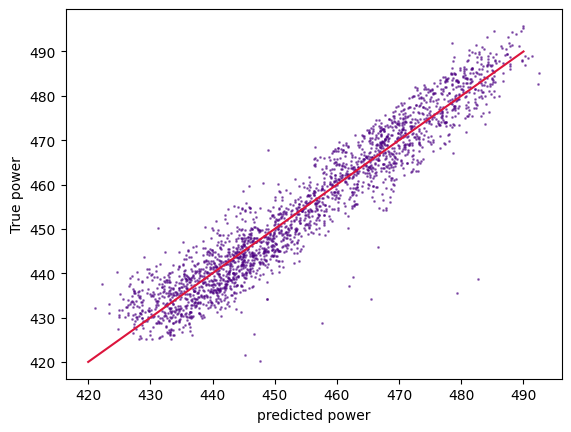

In [23]:
# Scatter ploting predicted values of vanila LinearRegression:

y_pred_test = model5.predict(X_test)

plt.scatter(y_pred_test, y_test, c='indigo', alpha=0.5, s=1)
plt.xlabel('predicted power')
plt.ylabel('True power')

plt.plot([420, 490], [420, 490], c='crimson')
pass

In [24]:
# Saving model:

with open('../models/LinearRegression.pkl', 'wb') as f:
    pickle.dump(model5, f)